In [47]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [48]:
attendance_valuation_elo_df = pd.read_csv("../data/nba_2017_att_val_elo.csv");attendance_valuation_elo_df.head()

,Unnamed: 0,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


In [49]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [50]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [51]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [52]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [53]:
plus_minus_df.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
players = []
for player in plus_minus_df["PLAYER"]:
    plyr, _ = player.split(",")
    players.append(plyr)
plus_minus_df.drop(["PLAYER"], inplace=True, axis=1)
plus_minus_df["PLAYER"] = players
plus_minus_df.head()

,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PLAYER
0,CLE,74,37.8,6.49,1.93,8.42,20.43,LeBron James
1,GS,79,33.4,7.27,0.14,7.41,18.80,Stephen Curry
2,CHI,76,37.0,4.82,1.80,6.62,17.35,Jimmy Butler
3,OKC,81,34.6,6.74,-0.47,6.27,17.34,Russell Westbrook
4,GS,76,32.5,1.55,5.59,7.14,16.84,Draymond Green


In [54]:
nba_players_df = br_stats_df.copy()
nba_players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
nba_players_df = nba_players_df.merge(plus_minus_df, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


In [55]:
pie_df_subset = pie_df[["PLAYER", "PIE", "PACE", "W"]].copy()
nba_players_df = nba_players_df.merge(pie_df_subset, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


In [56]:
nba_players_df.to_csv("../data/nba_2017_players_stats_combined.csv")

In [57]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION","TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()

,PLAYER,SALARY_MILLIONS
0,LeBron James,30.96
1,Mike Conley,26.54
2,Al Horford,26.54
3,Dirk Nowitzki,25.00
4,Carmelo Anthony,24.56


In [58]:
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary_df["PLAYER"].values.tolist()))

In [59]:
len(diff)

111

In [60]:
nba_players_with_salary_df = nba_players_df.merge(salary_df); nba_players_with_salary_df.to_csv("../data/nba_2017_nba_players_with_salary.csv")

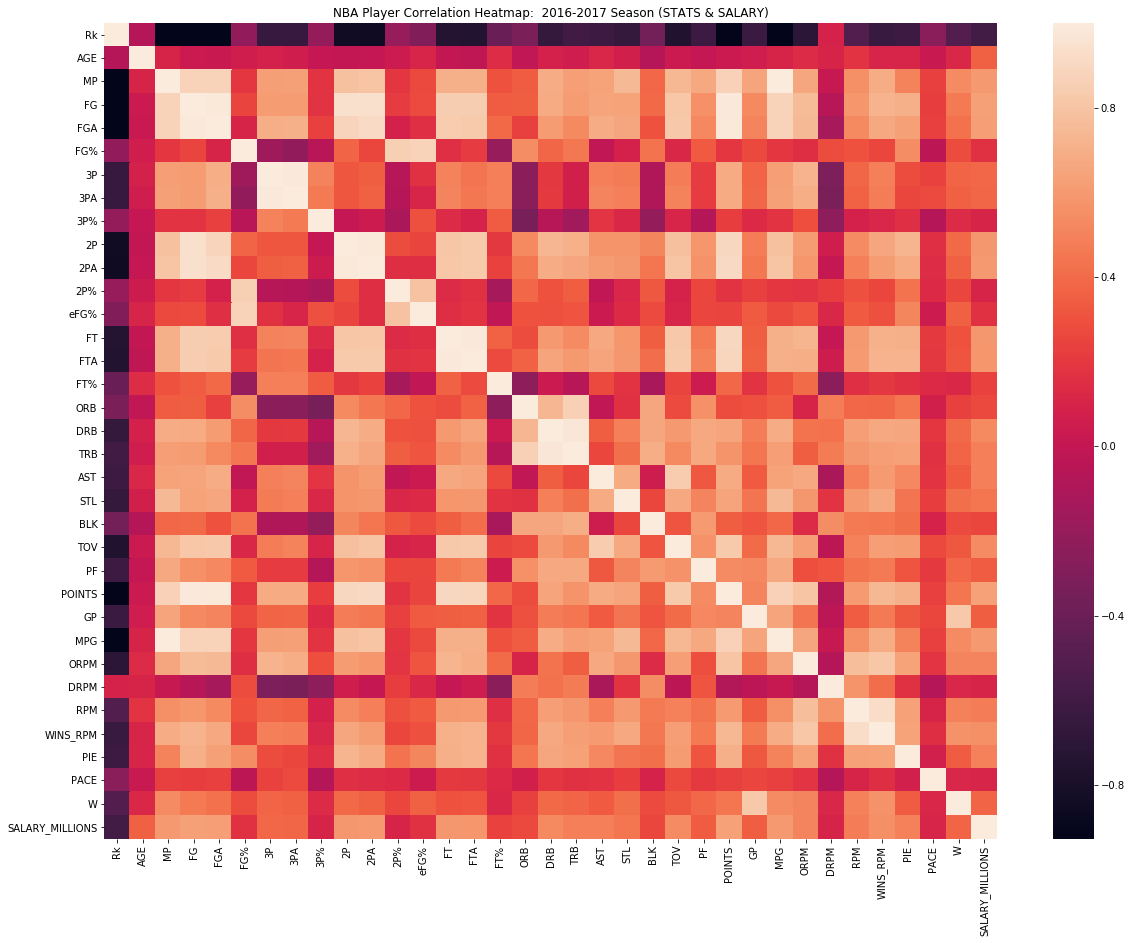

In [61]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY)")
corr = nba_players_with_salary_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

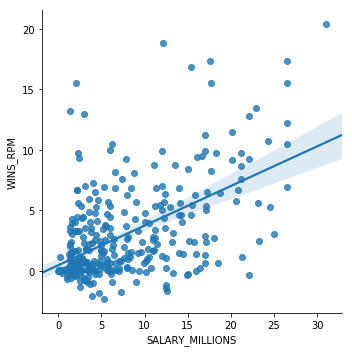

In [62]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS_RPM", data=nba_players_with_salary_df)

In [63]:
results = smf.ols('W ~POINTS', data=nba_players_with_salary_df).fit()

In [64]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     84.74
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           3.57e-18
Time:                        09:56:29   Log-Likelihood:                -1363.7
No. Observations:                 342   AIC:                             2731.
Df Residuals:                     340   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1105      1.282     14.908      0.0

In [65]:
results = smf.ols('W ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [66]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           9.34e-31
Time:                        09:56:30   Log-Likelihood:                -1334.8
No. Observations:                 342   AIC:                             2674.
Df Residuals:                     340   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8208      0.808     28.233      0.0

In [67]:
results = smf.ols('SALARY_MILLIONS ~POINTS', data=nba_players_with_salary_df).fit()

In [68]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           4.49e-40
Time:                        09:56:31   Log-Likelihood:                -1037.4
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     340   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0479      0.494      2.123      0.0

In [69]:
results = smf.ols('SALARY_MILLIONS ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [70]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           1.86e-28
Time:                        09:56:31   Log-Likelihood:                -1064.1
No. Observations:                 342   AIC:                             2132.
Df Residuals:                     340   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6501      0.366     12.695      0.0

In [71]:
from ggplot import *

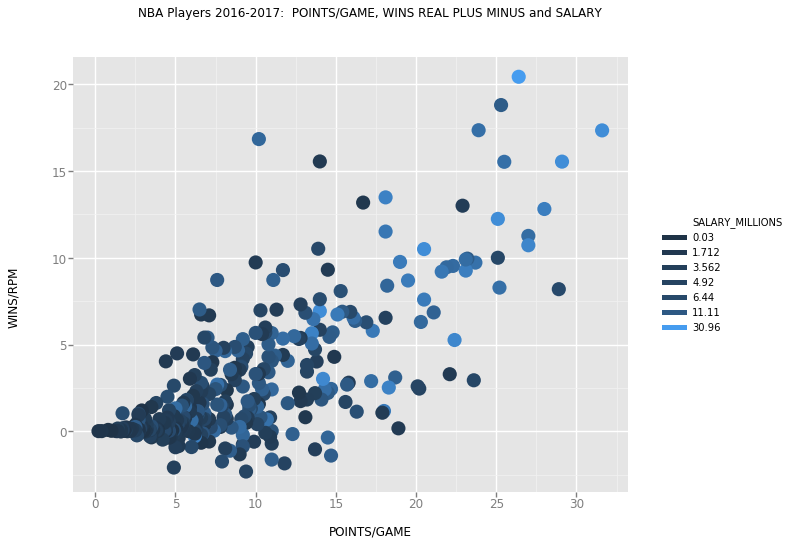

<ggplot: (279775815)>

In [72]:
p = ggplot(nba_players_with_salary_df,aes(x="POINTS", y="WINS_RPM", color="SALARY_MILLIONS")) + geom_point(size=200)
p + xlab("POINTS/GAME") + ylab("WINS/RPM") + ggtitle("NBA Players 2016-2017:  POINTS/GAME, WINS REAL PLUS MINUS and SALARY") 

In [73]:
wiki_df = pd.read_csv("../data/nba_2017_player_wikipedia.csv");wiki_df.head()


,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [74]:
wiki_df.rename(columns={'names': 'PLAYER', "pageviews": "PAGEVIEWS"}, inplace=True)

In [75]:
median_wiki_df = wiki_df.groupby("PLAYER").median()

In [76]:
median_wiki_df_small = median_wiki_df[["PAGEVIEWS"]]

In [77]:
median_wiki_df_small.reset_index(level=0, inplace=True);median_wiki_df_small.head()

,PLAYER,PAGEVIEWS
0,A.J. Hammons,1.0
1,Aaron Brooks,10.0
2,Aaron Gordon,666.0
3,Aaron Harrison,487.0
4,Adreian Payne,166.0


In [78]:
nba_players_with_salary_wiki_df = nba_players_with_salary_df.merge(median_wiki_df_small)

In [79]:
twitter_df = pd.read_csv("../data/nba_2017_twitter_players.csv");twitter_df.head()


,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [80]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_df.merge(twitter_df)

In [81]:
nba_players_with_salary_wiki_twitter_df.to_csv("../data/nba_2017_players_with_salary_wiki_twitter.csv")
nba_players_with_salary_wiki_twitter_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


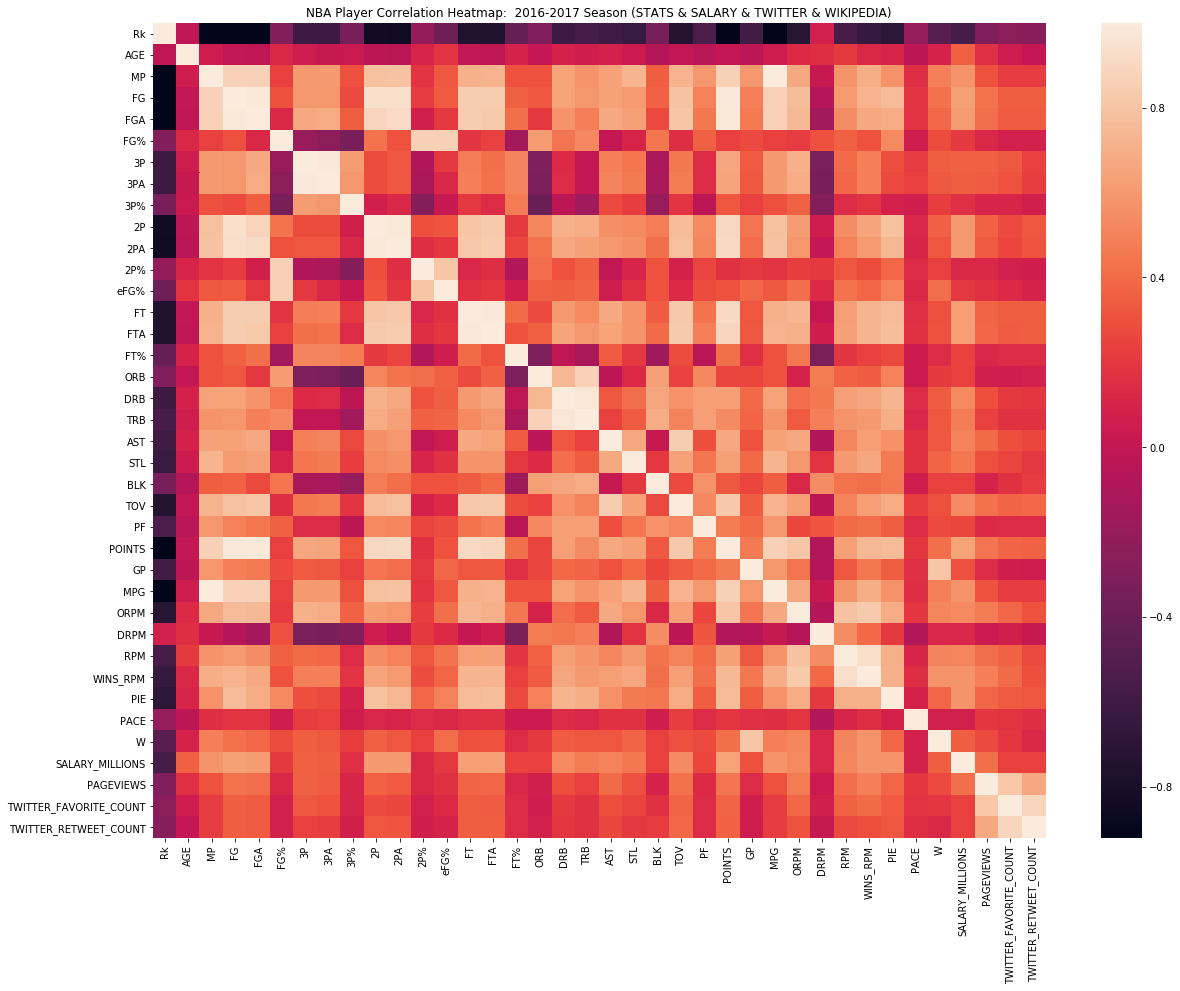

In [82]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY & TWITTER & WIKIPEDIA)")
corr = nba_players_with_salary_wiki_twitter_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [83]:
nba_players_with_salary_wiki_twitter_df.corr()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Rk,1.000000,-0.020209,-0.919629,-0.921524,-0.916483,-0.287412,-0.618473,-0.612320,-0.331180,-0.836341,...,0.082668,-0.553796,-0.647639,-0.694116,-0.196198,-0.475321,-0.567379,-0.305690,-0.252067,-0.264310
AGE,-0.020209,1.000000,0.052484,-0.006908,-0.018904,0.129123,0.053500,0.021440,0.027471,-0.033056,...,0.158563,0.207790,0.122101,0.113873,-0.034182,0.092175,0.354779,0.166699,0.048082,0.008563
MP,-0.919629,0.052484,1.000000,0.868258,0.871265,0.234976,0.596199,0.599654,0.297564,0.783183,...,0.019536,0.573235,0.694806,0.565987,0.157995,0.486120,0.577275,0.304930,0.214218,0.215855
FG,-0.921524,-0.006908,0.868258,1.000000,0.978105,0.300325,0.590194,0.584178,0.275942,0.941072,...,-0.060317,0.604333,0.721438,0.765449,0.175686,0.427651,0.630978,0.434746,0.347159,0.352017
FGA,-0.916483,-0.018904,0.871265,0.978105,1.000000,0.128217,0.672944,0.681072,0.353632,0.880942,...,-0.139709,0.543622,0.676531,0.688969,0.178010,0.389270,0.615622,0.410507,0.331997,0.336884
FG%,-0.287412,0.129123,0.234976,0.300325,0.128217,1.000000,-0.189882,-0.249493,-0.332643,0.435590,...,0.294782,0.359526,0.302050,0.532211,0.055676,0.286450,0.206219,0.122981,0.078011,0.081683
3P,-0.618473,0.053500,0.596199,0.590194,0.672944,-0.189882,1.000000,0.987919,0.611364,0.283150,...,-0.322161,0.400825,0.489492,0.291259,0.215440,0.347177,0.358943,0.360652,0.325250,0.235959
3PA,-0.612320,0.021440,0.599654,0.584178,0.681072,-0.249493,0.987919,1.000000,0.591970,0.280841,...,-0.330731,0.377633,0.482586,0.265635,0.232275,0.328095,0.351533,0.344331,0.304563,0.223190
3P%,-0.331180,0.027471,0.297564,0.275942,0.353632,-0.332643,0.611364,0.591970,1.000000,0.072061,...,-0.278990,0.141162,0.174999,0.089535,0.061785,0.223490,0.161030,0.109670,0.111462,0.069343
2P,-0.836341,-0.033056,0.783183,0.941072,0.880942,0.435590,0.283150,0.280841,0.072061,1.000000,...,0.061305,0.549015,0.651291,0.786668,0.118710,0.361855,0.598556,0.366933,0.275777,0.318836


In [84]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv")
endorsement_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
endorsement_df.head()

,PLAYER,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [85]:
endorsement_value_df = endorsement_df.merge(attendance_valuation_elo_df)
endorsement_value_df.drop("Unnamed: 0", inplace=True, axis=1)
endorsement_value_df.drop("GMS", inplace=True, axis=1)
endorsement_value_df.drop("SALARY_MILLIONS", inplace=True, axis=1)

In [86]:
endorsement_value_df

,PLAYER,TEAM,ENDORSEMENT_MILLIONS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,LeBron James,Cleveland Cavaliers,55,100,0.843042,0.020562,1200.0,1545,East
1,Kyrie Irving,Cleveland Cavaliers,13,100,0.843042,0.020562,1200.0,1545,East
2,Kevin Durant,Golden State Warriors,36,100,0.803436,0.019596,2600.0,1770,West
3,Stephen Curry,Golden State Warriors,35,100,0.803436,0.019596,2600.0,1770,West
4,James Harden,Houston Rockets,20,94,0.695903,0.016973,1650.0,1602,West
5,Russell Westbrook,Oklahoma City Thunder,15,100,0.746323,0.018203,1025.0,1543,West
6,Dwyane Wade,Chicago Bulls,13,104,0.888882,0.021680,2500.0,1519,East
7,Derrick Rose,New York Knicks,14,100,0.810741,0.019774,3300.0,1374,East
8,Carmelo Anthony,New York Knicks,8,100,0.810741,0.019774,3300.0,1374,East
9,Chris Paul,Los Angeles Clippers,8,100,0.782609,0.019088,2000.0,1636,West


In [87]:
endorsement_value_stats_df = endorsement_value_df.merge(nba_players_with_salary_wiki_twitter_df,how="inner", on="PLAYER")

In [ ]:
endorsement_value_stats_df.to_csv("../data/nba_2017_att_val.csv")

In [88]:
endorsement_value_stats_df.corr()

,ENDORSEMENT_MILLIONS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,Rk,AGE,MP,FG,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
ENDORSEMENT_MILLIONS,1.000000,-0.074306,0.125005,0.125028,-0.239419,0.465757,-0.473741,0.029488,0.532653,0.530715,...,0.479136,0.570346,0.635054,0.313954,0.330321,0.599848,0.244687,0.809983,0.595061,0.409703
PCT,-0.074306,1.000000,0.854332,0.854346,0.238631,-0.136504,0.508213,0.536777,-0.624804,-0.194534,...,0.181126,-0.291991,-0.406363,-0.396602,-0.418478,-0.441505,-0.173259,0.107653,0.014153,0.025068
TOTAL_MILLIONS,0.125005,0.854332,1.000000,1.000000,0.225686,-0.190409,0.441415,0.446302,-0.365703,-0.139626,...,0.060490,-0.368823,-0.444558,-0.623015,-0.532115,-0.378214,-0.177570,0.243391,0.058589,0.113360
AVG_MILLIONS,0.125028,0.854346,1.000000,1.000000,0.225650,-0.190366,0.441390,0.446289,-0.365698,-0.139598,...,0.060529,-0.368776,-0.444517,-0.622974,-0.532093,-0.378175,-0.177576,0.243416,0.058613,0.113361
VALUE_MILLIONS,-0.239419,0.238631,0.225686,0.225650,1.000000,-0.227356,0.591631,0.299777,-0.539895,-0.584957,...,-0.218205,-0.566579,-0.625420,-0.682789,-0.035688,-0.489445,-0.283792,-0.102623,-0.004293,0.240855
ELO,0.465757,-0.136504,-0.190409,-0.190366,-0.227356,1.000000,-0.381297,-0.244167,-0.008865,0.139849,...,0.575989,0.715941,0.626730,0.492768,0.705340,0.828870,-0.233741,0.466661,0.476510,0.066862
Rk,-0.473741,0.508213,0.441415,0.441390,0.591631,-0.381297,1.000000,0.474310,-0.778643,-0.875173,...,0.044703,-0.523799,-0.708079,-0.601686,-0.608732,-0.723024,-0.164240,-0.376137,-0.323192,0.021291
AGE,0.029488,0.536777,0.446302,0.446289,0.299777,-0.244167,0.474310,1.000000,-0.383661,-0.408581,...,0.392396,-0.116076,-0.191207,-0.200509,-0.494261,-0.455436,0.359643,0.049190,-0.126321,-0.237298
MP,0.532653,-0.624804,-0.365703,-0.365698,-0.539895,-0.008865,-0.778643,-0.383661,1.000000,0.758705,...,-0.065057,0.411843,0.591691,0.405394,0.171134,0.478440,0.382743,0.322506,0.199189,0.090765
FG,0.530715,-0.194534,-0.139626,-0.139598,-0.584957,0.139849,-0.875173,-0.408581,0.758705,1.000000,...,-0.077354,0.368877,0.551537,0.486730,0.369516,0.484935,0.245507,0.394205,0.280957,0.098492


In [89]:
results = smf.ols('ENDORSEMENT_MILLIONS ~PAGEVIEWS', data=endorsement_value_stats_df).fit()

In [90]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     ENDORSEMENT_MILLIONS   R-squared:                       0.656
Model:                              OLS   Adj. R-squared:                  0.613
Method:                   Least Squares   F-statistic:                     15.26
Date:                  Tue, 01 Aug 2017   Prob (F-statistic):            0.00450
Time:                          09:56:46   Log-Likelihood:                -35.645
No. Observations:                    10   AIC:                             75.29
Df Residuals:                         8   BIC:                             75.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0826      5.011

/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


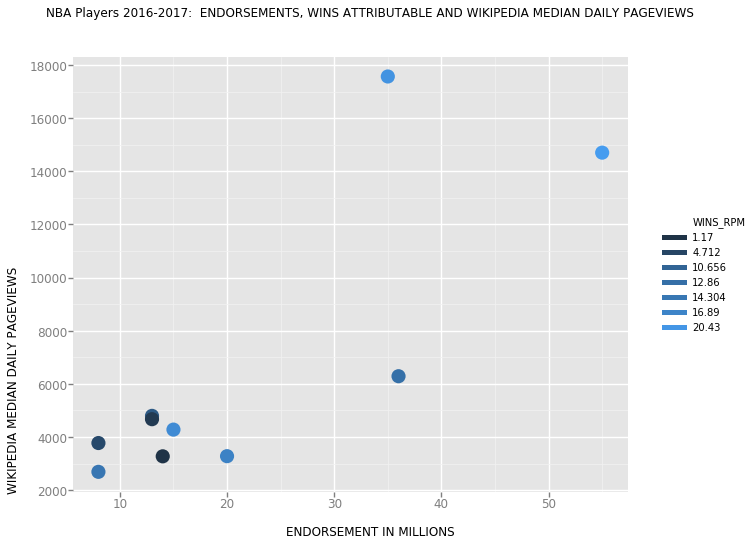

<ggplot: (-9223372036569848807)>

In [99]:
p = ggplot(endorsement_value_stats_df,aes(x="ENDORSEMENT_MILLIONS", y="PAGEVIEWS", color="WINS_RPM")) + geom_point(size=200)
p + xlab("ENDORSEMENT IN MILLIONS") + ylab("WIKIPEDIA MEDIAN DAILY PAGEVIEWS") + ggtitle("NBA Players 2016-2017:  ENDORSEMENTS, WINS ATTRIBUTABLE AND WIKIPEDIA MEDIAN DAILY PAGEVIEWS") 

In [100]:
endorsement_value_stats_df.to_csv("../data/nba_2017_endorsement_full_stats.csv")